In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

import scipy.stats as stats

In [7]:
df=pd.read_csv("concrete_data.csv")

In [9]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [49]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [53]:
x_train.shape,y_test.shape

((824, 8), (206,))

C:\Users\RAJ KUMAR RAWAT\AppData\Local\Temp\ipykernel_19184\476858724.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


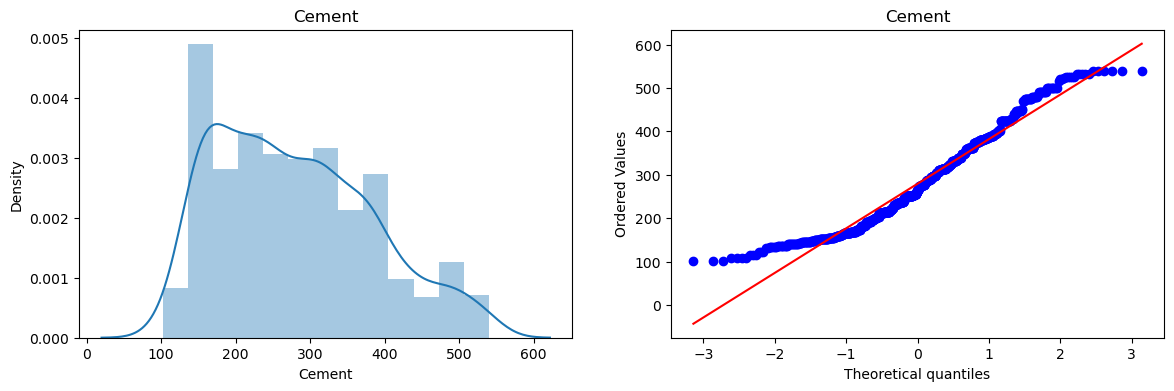

C:\Users\RAJ KUMAR RAWAT\AppData\Local\Temp\ipykernel_19184\476858724.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


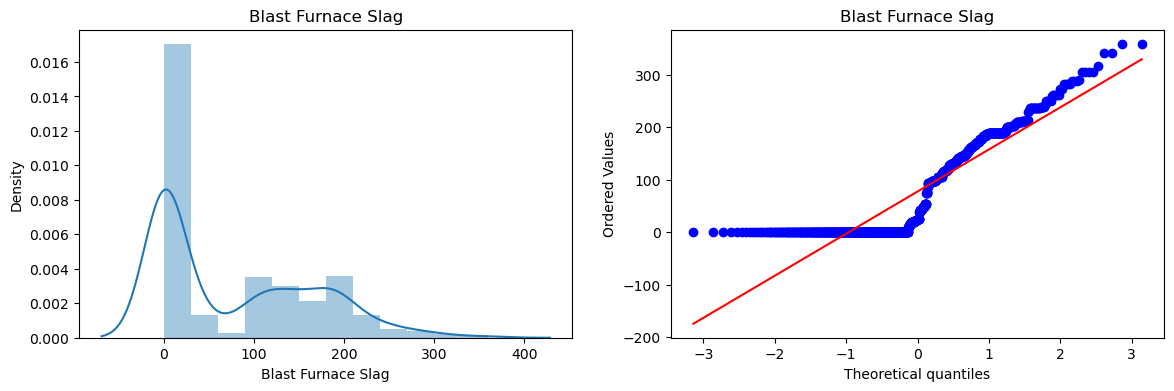

C:\Users\RAJ KUMAR RAWAT\AppData\Local\Temp\ipykernel_19184\476858724.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


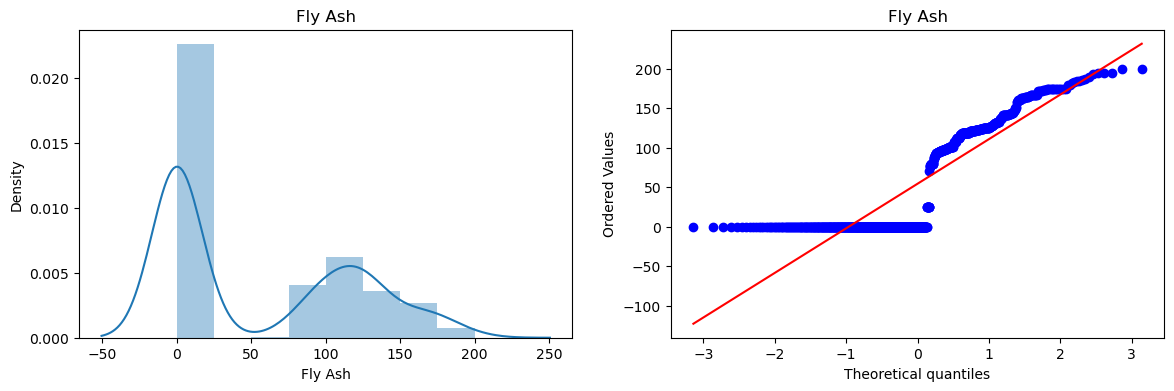

C:\Users\RAJ KUMAR RAWAT\AppData\Local\Temp\ipykernel_19184\476858724.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


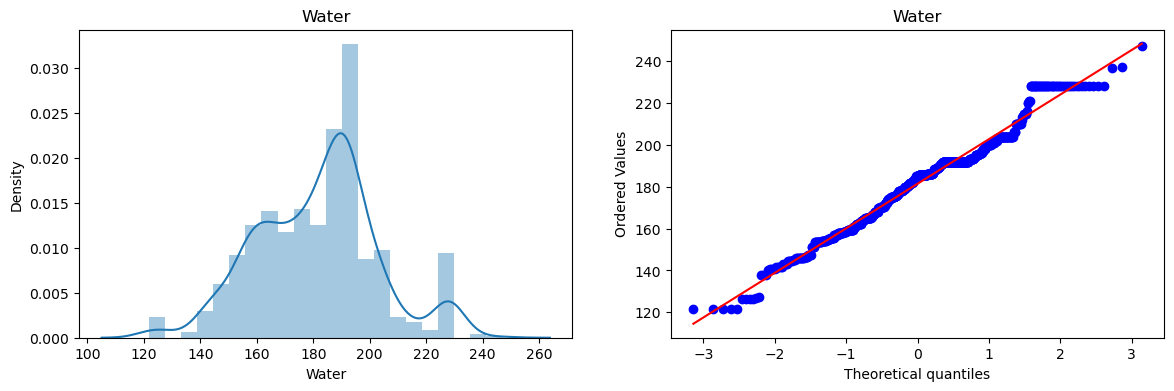

C:\Users\RAJ KUMAR RAWAT\AppData\Local\Temp\ipykernel_19184\476858724.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


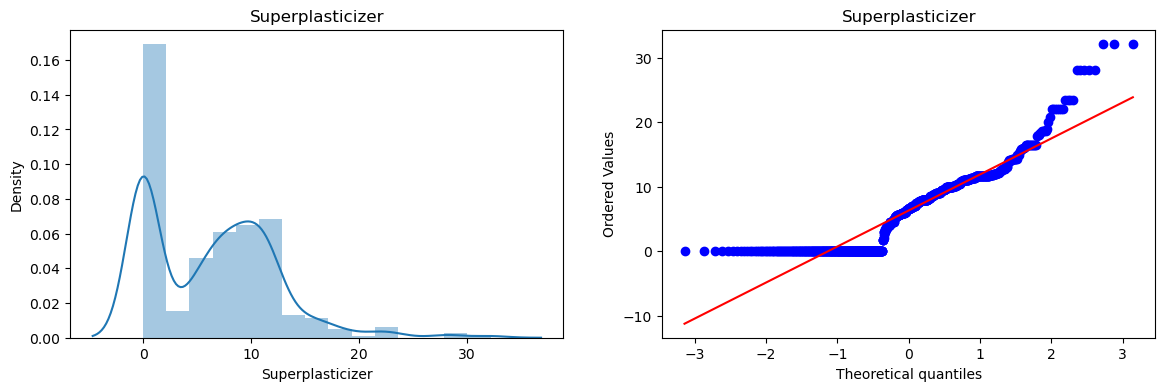

C:\Users\RAJ KUMAR RAWAT\AppData\Local\Temp\ipykernel_19184\476858724.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


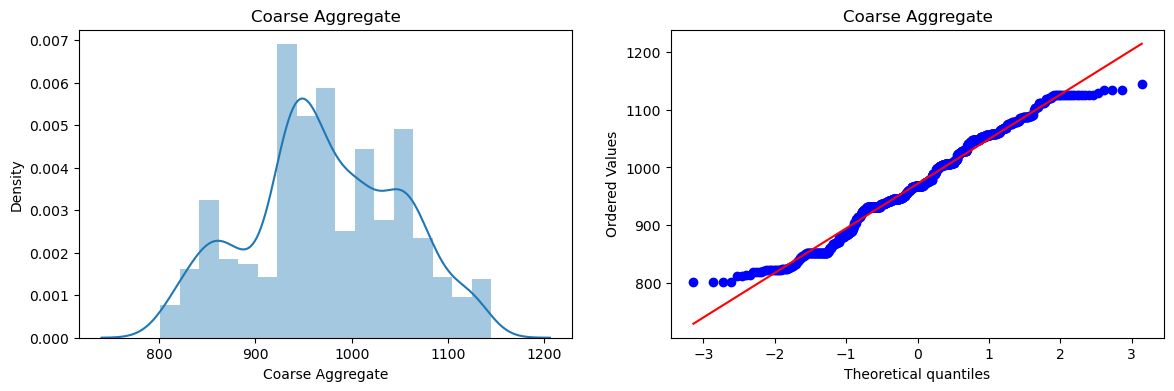

C:\Users\RAJ KUMAR RAWAT\AppData\Local\Temp\ipykernel_19184\476858724.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


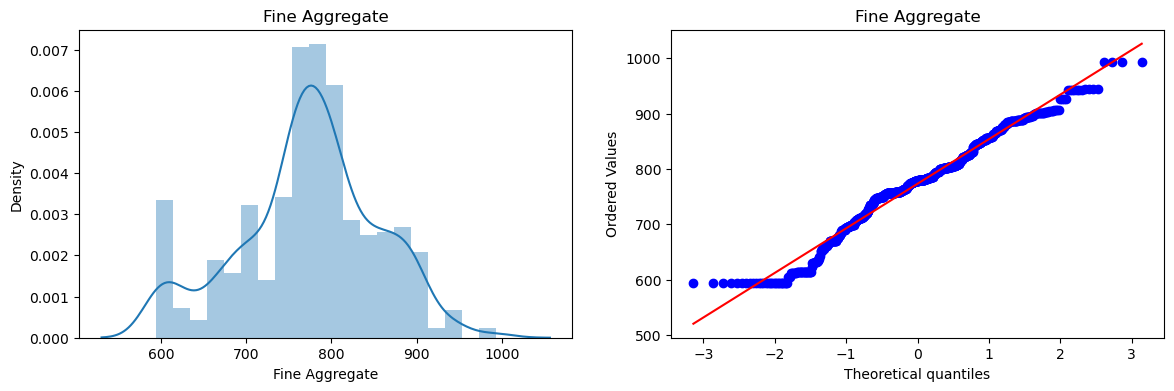

C:\Users\RAJ KUMAR RAWAT\AppData\Local\Temp\ipykernel_19184\476858724.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


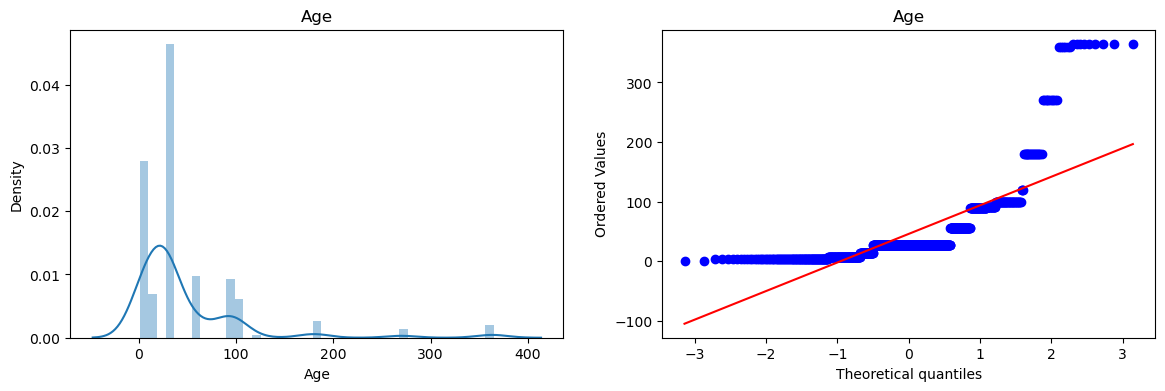

In [83]:
for col in x.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(x_train[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(x_train[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

In [55]:
lr = LinearRegression()

In [29]:
lr = LinearRegression()

lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)

r2_score(y_test,y_pred)

0.6369606518338295

In [33]:
np.mean(cross_val_score(lr,df.iloc[:,0:-1],df.iloc[:,-1],scoring='r2'))

0.4609940491662866

In [59]:
pt = PowerTransformer(method='box-cox')
# Fit the transformer and transform the data
X_transformed = pt.fit_transform(x+0.0000001)

lr = LinearRegression()
# Transform the data using the fitted transformer
np.mean(cross_val_score(lr,X_transformed,y,scoring='r2'))

0.665853794702427

In [69]:
# Transform the data using the fitted transformer
X_transformed

array([[ 1.99427163, -1.08685375, -0.90528496, ...,  0.86216079,
        -1.20848962,  0.11185503],
       [ 1.99427163, -1.08685375, -0.90528496, ...,  1.05711395,
        -1.20848962,  0.11185503],
       [ 0.60739886,  0.94736522, -0.90528496, ..., -0.53049756,
        -2.08575009,  2.1454795 ],
       ...,
       [-1.45632705,  0.94468921,  1.10093378, ..., -1.03605728,
         0.03769697,  0.11185503],
       [-1.29079246,  0.98034528, -0.90528496, ...,  0.20980302,
         0.15117182,  0.11185503],
       [-0.04388169,  0.90503985,  1.07779322, ..., -1.39051824,
        -0.1947544 ,  0.11185503]])

In [75]:
# Transform the data using the fitted transformer
X_train_transformed = pd.DataFrame(X_transformed,columns=x_train.columns)

In [77]:
# Transform the data using the fitted transformer
X_train_transformed.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,1.994272,-1.086854,-0.905285,-0.914482,0.485973,0.862161,-1.208490,0.111855
1,1.994272,-1.086854,-0.905285,-0.914482,0.485973,1.057114,-1.208490,0.111855
2,0.607399,0.947365,-0.905285,2.136472,-1.306273,-0.530498,-2.085750,2.145479
3,0.607399,0.947365,-0.905285,2.136472,-1.306273,-0.530498,-2.085750,2.433424
4,-0.744848,0.938426,-0.905285,0.496971,-1.306273,0.065409,0.629016,2.420157


C:\Users\RAJ KUMAR RAWAT\AppData\Local\Temp\ipykernel_19184\1593743609.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])
C:\Users\RAJ KUMAR RAWAT\AppData\Local\Temp\ipykernel_19184\1593743609.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


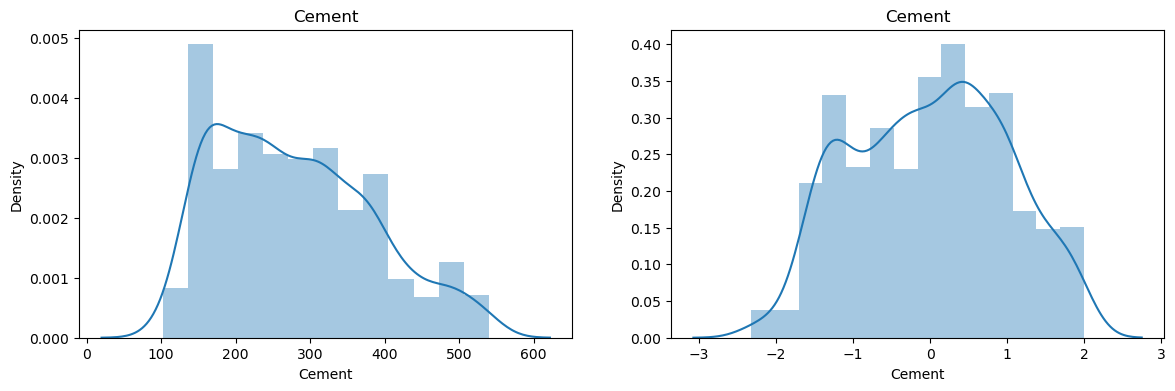

C:\Users\RAJ KUMAR RAWAT\AppData\Local\Temp\ipykernel_19184\1593743609.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])
C:\Users\RAJ KUMAR RAWAT\AppData\Local\Temp\ipykernel_19184\1593743609.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


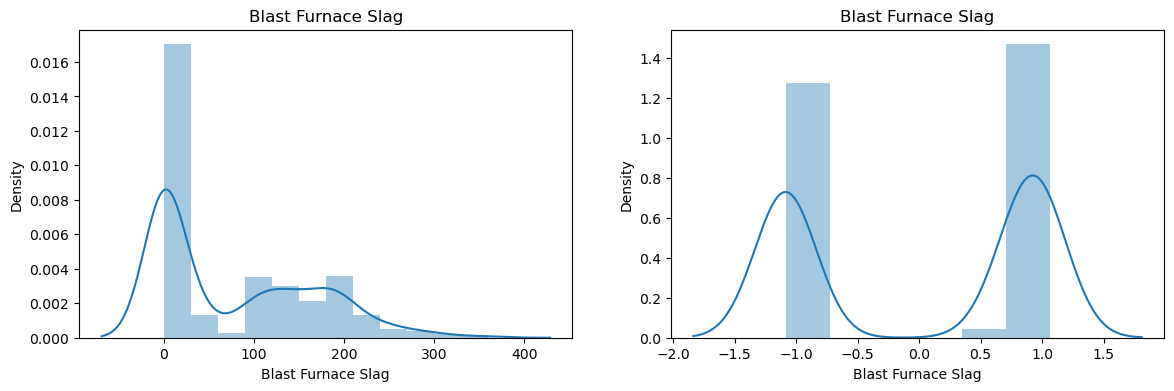

C:\Users\RAJ KUMAR RAWAT\AppData\Local\Temp\ipykernel_19184\1593743609.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])
C:\Users\RAJ KUMAR RAWAT\AppData\Local\Temp\ipykernel_19184\1593743609.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


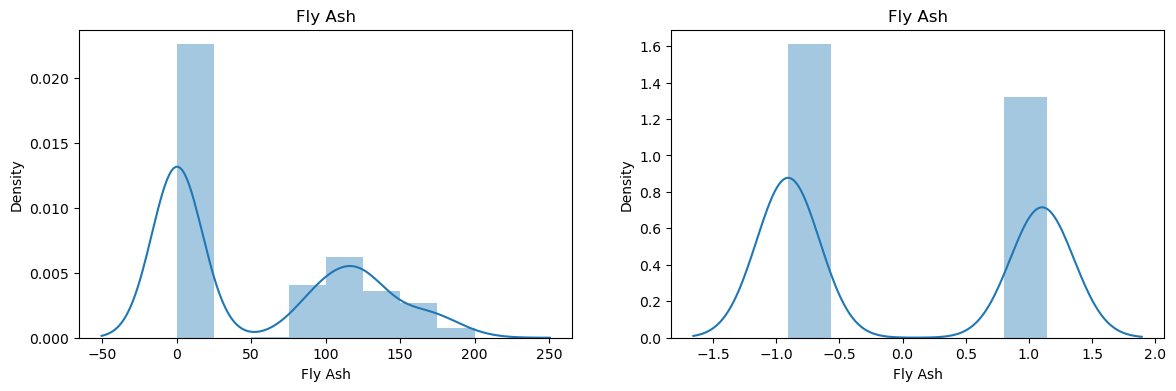

C:\Users\RAJ KUMAR RAWAT\AppData\Local\Temp\ipykernel_19184\1593743609.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])
C:\Users\RAJ KUMAR RAWAT\AppData\Local\Temp\ipykernel_19184\1593743609.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


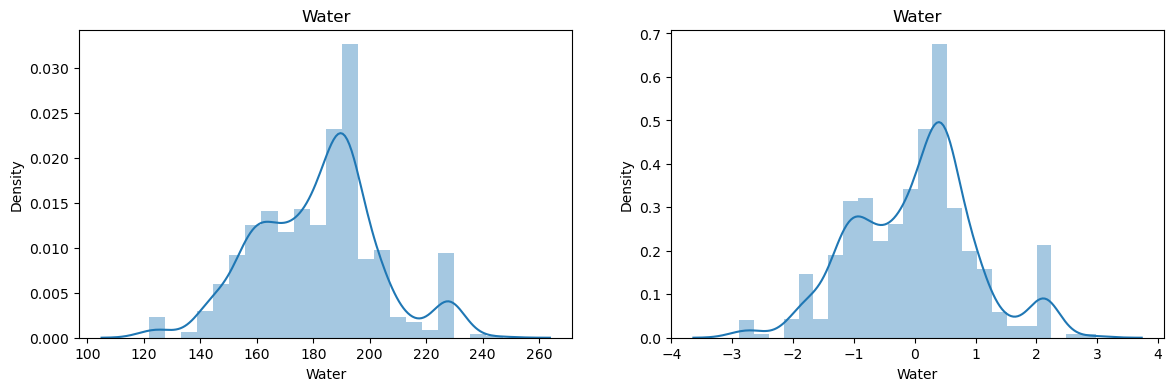

C:\Users\RAJ KUMAR RAWAT\AppData\Local\Temp\ipykernel_19184\1593743609.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])
C:\Users\RAJ KUMAR RAWAT\AppData\Local\Temp\ipykernel_19184\1593743609.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


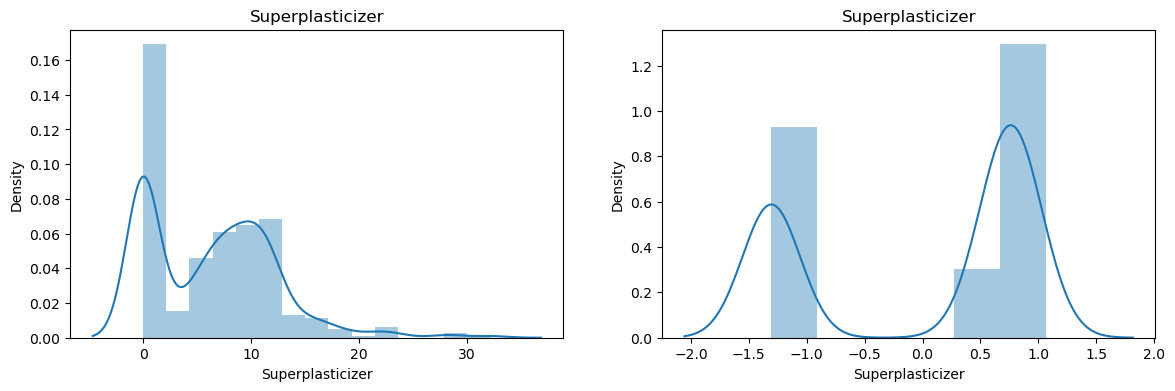

C:\Users\RAJ KUMAR RAWAT\AppData\Local\Temp\ipykernel_19184\1593743609.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])
C:\Users\RAJ KUMAR RAWAT\AppData\Local\Temp\ipykernel_19184\1593743609.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


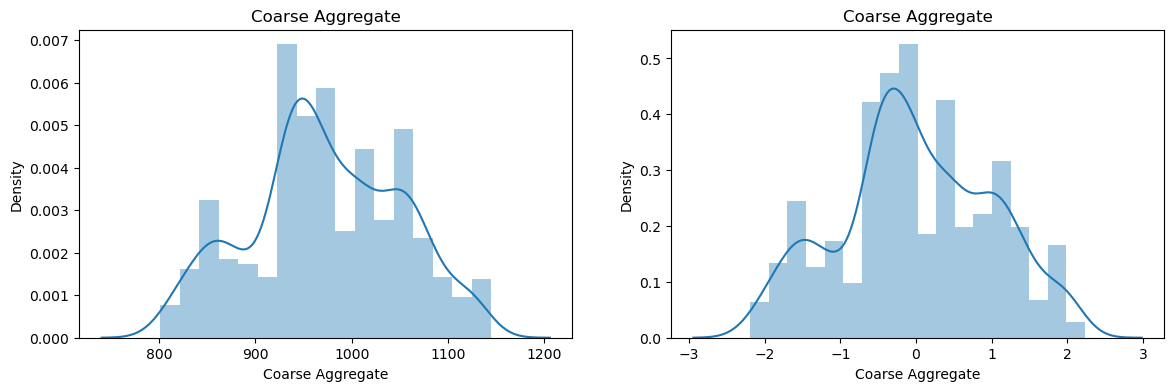

C:\Users\RAJ KUMAR RAWAT\AppData\Local\Temp\ipykernel_19184\1593743609.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])
C:\Users\RAJ KUMAR RAWAT\AppData\Local\Temp\ipykernel_19184\1593743609.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


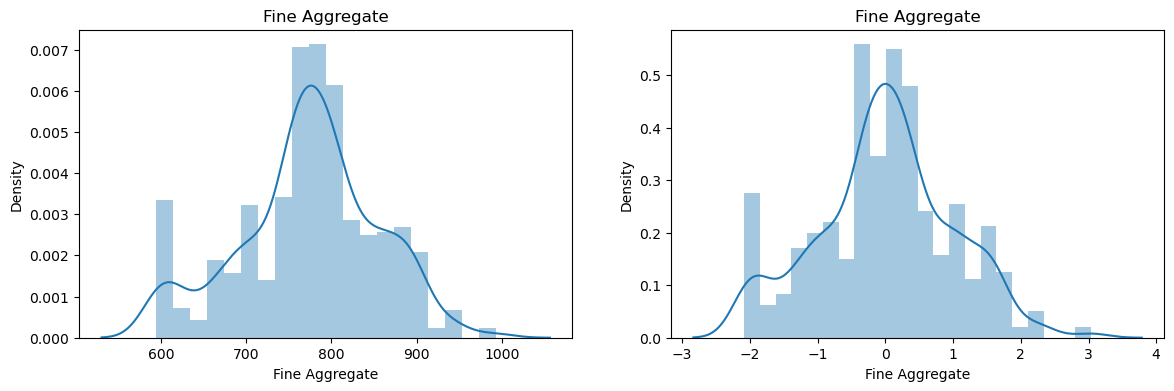

C:\Users\RAJ KUMAR RAWAT\AppData\Local\Temp\ipykernel_19184\1593743609.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])
C:\Users\RAJ KUMAR RAWAT\AppData\Local\Temp\ipykernel_19184\1593743609.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


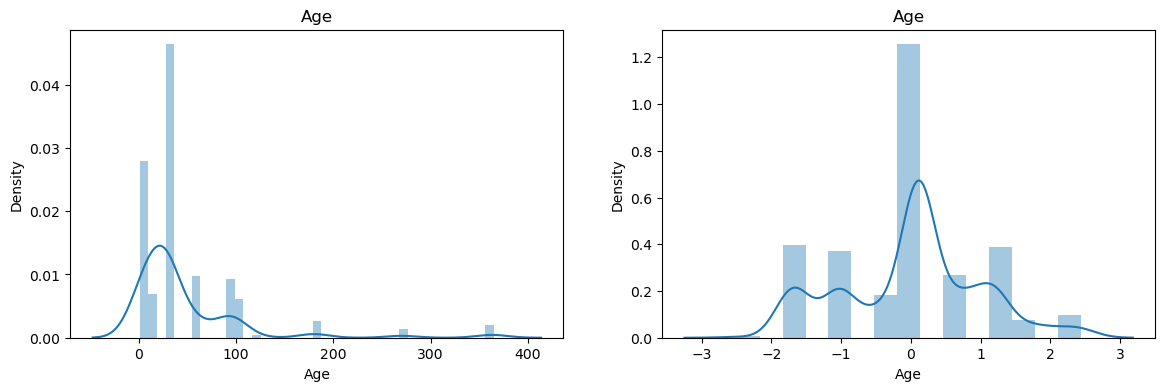

In [81]:


# Transform the data using the fitted transformer
for col in X_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(x_train[col])
    plt.title(col)

    plt.subplot(122)
# Transform the data using the fitted transformer
    sns.distplot(X_train_transformed[col])
    plt.title(col)

    plt.show()

In [91]:
pt = PowerTransformer()
# Fit the transformer and transform the data
X_transformed = pt.fit_transform(x)

lr = LinearRegression()
# Transform the data using the fitted transformer
np.mean(cross_val_score(lr,X_transformed,y,scoring='r2'))

0.6834625134285743